# Assignment \#7 : Equations of State and the Temperature-Density Plane

Kaimi Kahihikolo

Due: 3 April 2019

In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt
plt.ion()
import numpy as np
import astropy.constants as const
import astropy.units as u

plt.style.use('seaborn')

___
## (1) Different Forumals for Pressure

(1.1) Put together the formulas for:
1. Radiation pressure
1. Ideal gas pressure
1. Non-relativistic electron degeneracy pressure
1. Extremely relativistic electron degeneracy pressure

(1.2) Prepare a diagram showing the log T, log ρ (g cm−3) plane: log T increases vertically and log density increases horizontally. The limits for your diagram are: log T from 3 to 12, log density from -9 to +9.
___

### (1.1) Formulas

1. Radiation Pressure: $P = \frac{aT^4}{3}$
1. Ideal Gas Pressure: $PV = nRT \Rightarrow PM=\rho RT \Rightarrow P=\frac{\rho k T}{\mu m_\mu}$
1. Non-relativistic Electron Degeneracy Pressure: $P=10^{13}\left(\frac{\rho}{\mu_e}\right)^{5/3}$
1. Relativistic Degeneracy Pressure: $P=1.245\cdot 10^{15} \left(\frac{\rho}{\mu_e}\right)^{4/3}$

### (1.2) Plot

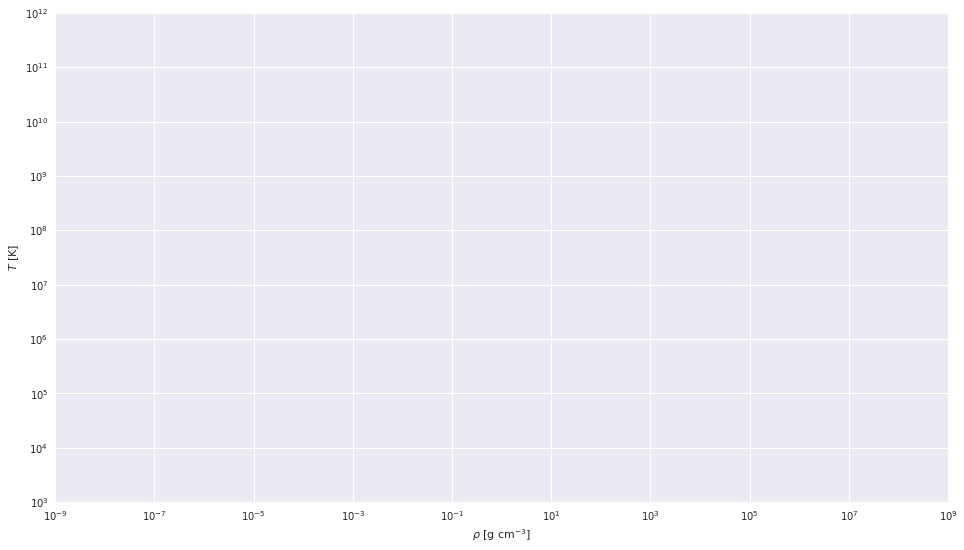

In [2]:
fig, ax = plt.subplots(1, figsize=(16,9))

ax.set_xlabel(r'$\rho$ [g cm$^{-3}$]')
ax.set_xscale('log')
ax.set_ylabel(r'$T$ [K]')
ax.set_yscale('log')

ax.set_ylim(10**3, 10**12)
ax.set_xlim(10**-9, 10**9)
plt.show()

___
## (2) Areas of Preponderance in the $\log(T)$ - $\log(\rho)$ Plane

(2.1) Find the equation of a boundary separating the region where radiation pressure dominates from the region where gas pressure (take Pg = nkT) dominates. Plot the boundary you have found in the log T - log ρ diagram.

(2.2) Find the boundary separating the nondegenerate region from the degenerate non-relativistic region (neglect radiation pressure for this estimate), and add it to your diagram.

(2.3) Find the boundary separating the nondegenerate region from the degenerate extremely relativistic region (neglect radiation pressure for this estimate), and add it to your diagram.

(2.4) Find the position of a vertical line equally distant from the non-relativistic and extremely relativistic degenerate regions, and add it to the diagram. This line should intersect the boundary between non-degenerate and degenerate regions near the point where the boundary’s slope changes.

(2.5) Your diagram should show 4 regions in the log T - log ρ plane, one region for each dominant source of pressure. Label each region accordingly. Indicate the position of (T, $\rho$) for the core of the Sun in the plot. Take $T = 15$ million K, $\rho = 150$ g cm−3. What equation of state is most adequate for solar conditions at the core?

_Note:_ to calculate the equations of the different boundaries, you need to know the mean molecular weight $\mu$ and the mean molecular weight per electron $\mu_e$. Assume that $\mu = 0.85$ and $\mu_e = 1.5$.
___

In [3]:
## define constants
a = const.sigma_sb * 4. / const.c ## Radiation density constant
mu = 0.85
mu_e = 1.5
m_u = 1.673 * 10**(-24) * u.g

### (2.1) Radation - Gas:

$$\frac{aT^4}{3} = \frac{\rho k T}{\mu m_u}$$
$$\Rightarrow T = \left(\frac{3 \rho k}{a \mu m_u}\right)^{1/3}$$

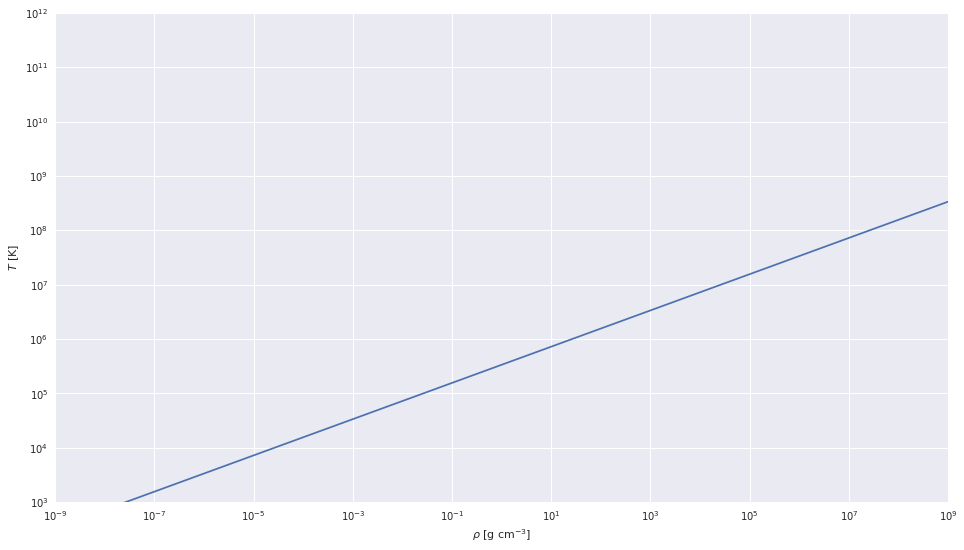

In [4]:
T_1 = lambda rho: (3 * rho * const.k_B / (a * mu * m_u))**(1/3)
rhos = np.logspace(-9, 9, 1000) *u.g * u.cm**(-3)

fig, ax = plt.subplots(1, figsize=(16,9))

ax.plot(rhos, T_1(rhos))
ax.set_xlabel(r'$\rho$ [g cm$^{-3}$]')
ax.set_xscale('log')
ax.set_ylabel(r'$T$ [K]')
ax.set_yscale('log')

ax.set_ylim(10**3, 10**12)
ax.set_xlim(10**-9, 10**9)
plt.show()

In [5]:
T(rhos).decompose()

NameError: name 'T' is not defined

### (2.2) Non-degenerate - Non-relativistic

$$\frac{\rho k T}{\mu m_u} = 10^{13} \left(\frac{\rho}{\mu_e}\right)^{5/3}$$
$$\Rightarrow T = 10^{13} \frac{\mu m_u}{k (\mu_e)^{5/3}} (\rho)^{2/3}$$

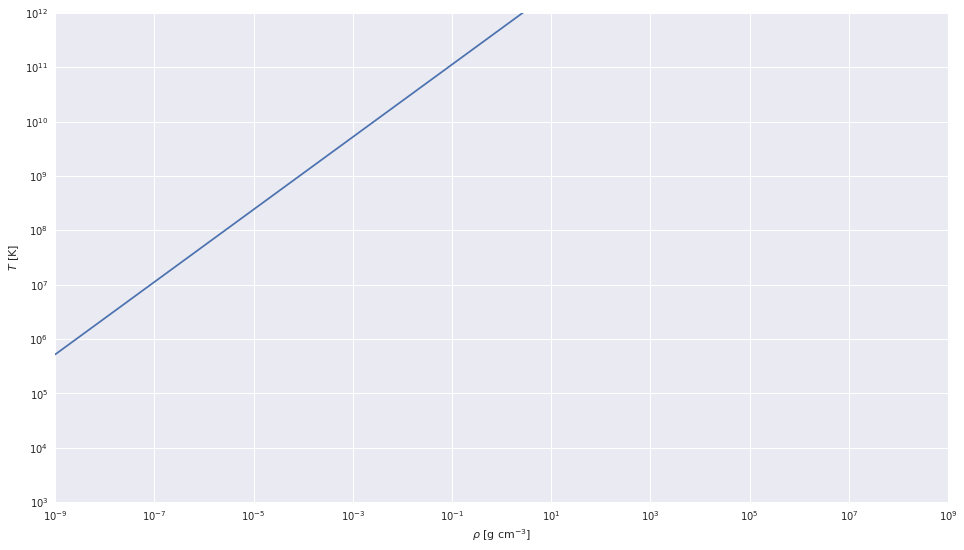

In [6]:
T_2 = lambda rho: 10**(13) * mu * m_u / (const.k_B * mu_e**(5/3)) * rho**(2/3)

fig, ax = plt.subplots(1, figsize=(16,9))

ax.plot(rhos, T_2(rhos))
ax.set_xlabel(r'$\rho$ [g cm$^{-3}$]')
ax.set_xscale('log')
ax.set_ylabel(r'$T$ [K]')
ax.set_yscale('log')

ax.set_ylim(10**3, 10**12)
ax.set_xlim(10**-9, 10**9)
plt.show()

In [ ]:
T(rhos).decompose() #errr...

### (2.3) Non-degenerate - Relativistic

$$\frac{\rho k T}{\mu m_u} =1.245 \cdot 10^{15} \left(\frac{\rho}{\mu_e}\right)^{4/3}$$
$$\Rightarrow T = 1.245 \cdot 10^{15} \frac{\mu m_u}{k (\mu_e)^{4/3}} (\rho)^{1/3}$$

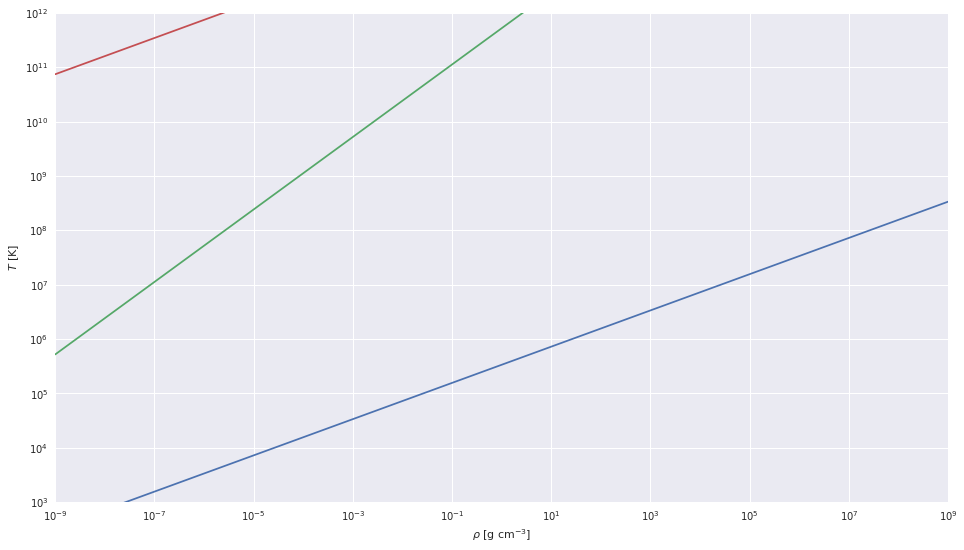

In [9]:
T_3 = lambda rho: 1.245e15 * mu * m_u / (const.k_B * mu_e**(4/3)) * rho**(1/3)

fig, ax = plt.subplots(1, figsize=(16,9))

for T in [T_1, T_2, T_3]:
    ax.plot(rhos, T(rhos))
ax.set_xlabel(r'$\rho$ [g cm$^{-3}$]')
ax.set_xscale('log')
ax.set_ylabel(r'$T$ [K]')
ax.set_yscale('log')


ax.set_ylim(10**3, 10**12)
ax.set_xlim(10**-9, 10**9)
plt.show()